# DEMO: Diffusion Image Generator

This notebook is a demonstrator of the text-to-image generation based on the obtained prompts.
Inspired from [Stable Diffusion colab🎨](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb#scrollTo=xSKWBKFPArKS)

### Import libraries

In [1]:
import torch
torch.cuda.empty_cache()

In [2]:
import sys
sys.path.append('..')
from diff_generator.fromprompt_t2i_generation import *

/home/safouane/miniconda3/envs/srt2i3/lib/python3.9/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### Load stable diffusion

In [3]:
pipe = load_diffusion_model("stabilityai/stable-diffusion-2-1-base")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Stable Diffusion Model successfully loaded


### image generation


Let's now generation the images.
The seed value has been taken from the colab notebook of stable diffusion [Stable Diffusion Model](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb)


  0%|          | 0/50 [00:00<?, ?it/s]

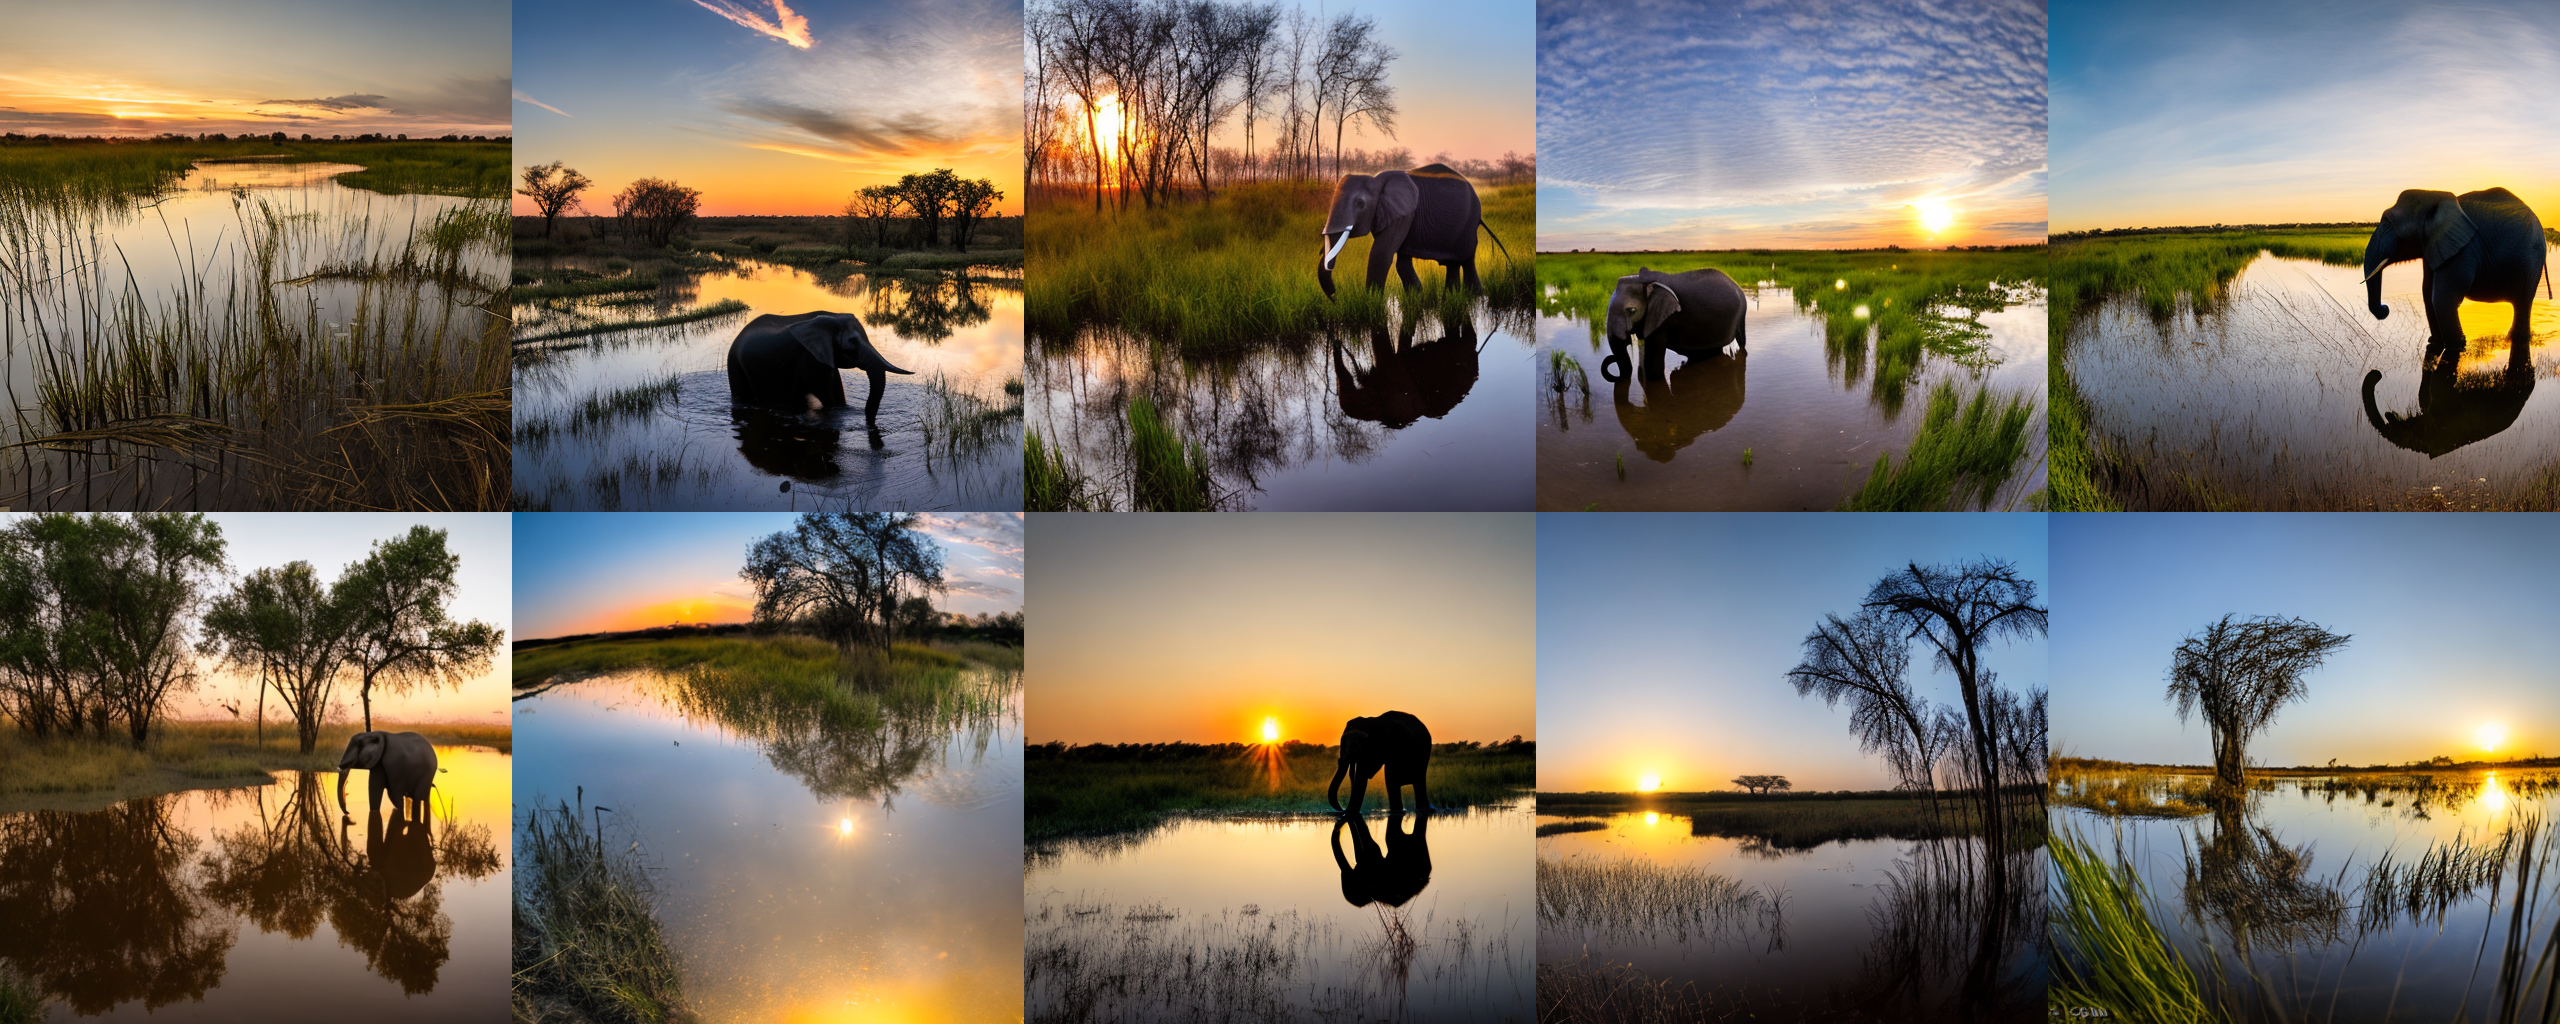

In [4]:
num_images = 10

generator = torch.Generator("cuda:0").manual_seed(42)

prompt = ["Photo of an elephant in a marsh, Wading through water, Reflection on the water, Background: reeds and sunrise, Canon EOS 5D Mark IV, 15mm fisheye, f/2.8, RAW photo"] * num_images

images = pipe(prompt, generator=generator).images
grid = image_grid(images, rows=2, cols=5)
#grid.save("generated_image.png")
grid